1. Initial Data Inspection

Dataset Info:
Shape: (46109, 14)
Columns: ['SpO2', 'HR', 'AccX', 'AccY', 'AccZ', 'Temp', 'EDA', 'Annotation', 'Subject', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'Annotation_Numeric']

Data Types:
SpO2                  float64
HR                    float64
AccX                  float64
AccY                  float64
AccZ                  float64
Temp                  float64
EDA                   float64
Annotation             object
Subject                object
Age                     int64
Gender                 object
Height_cm               int64
Weight_kg               int64
Annotation_Numeric      int64
dtype: object

First 5 rows:


,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Annotation,Subject,Age,Gender,Height_cm,Weight_kg,Annotation_Numeric
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,1
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Relax,Subject1,30,M,177,94,1
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Relax,Subject1,30,M,177,94,1
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Relax,Subject1,30,M,177,94,1
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Relax,Subject1,30,M,177,94,1



2. Missing Values Analysis
Empty DataFrame
Columns: [Missing Values, % Missing]
Index: []


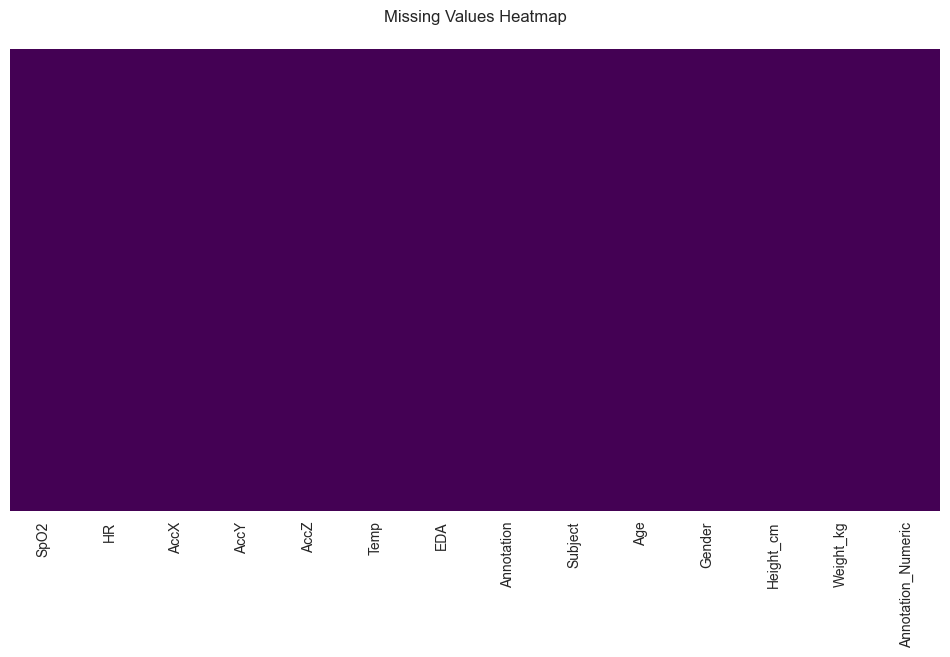


3. Data Cleaning

Number of duplicate rows before removal: 5322
Number of duplicate rows after removal: 0
Total duplicate rows removed: 5322

Constant columns: []

4. Descriptive Statistics

Numerical Columns Statistics:


,count,mean,std,min,25%,50%,75%,max
SpO2,40787.0,95.925338,1.754278,80.000214,95.000000,96.000000,96.999954,100.000000
HR,40787.0,78.464004,15.410153,48.000183,66.001038,76.000778,88.000000,134.000000
AccX,40787.0,0.549094,0.471970,-1.319995,0.260013,0.609969,0.949966,1.909986
AccY,40787.0,-0.684634,0.279120,-2.079974,-0.949970,-0.700004,-0.479960,0.839990
AccZ,40787.0,-0.173153,0.394558,-1.789971,-0.259981,-0.110017,-0.010001,2.149979
Temp,40787.0,31.911524,1.584299,24.900037,31.000043,31.999942,32.900000,36.000000
EDA,40787.0,1.763706,2.089164,0.002008,0.277013,0.856032,2.437997,9.146924
Age,40787.0,26.094001,3.690509,19.000000,23.000000,26.000000,29.000000,33.000000
Height_cm,40787.0,170.585848,7.739517,157.000000,165.000000,170.000000,177.000000,182.000000
Weight_kg,40787.0,66.008655,13.496192,44.000000,57.000000,64.000000,71.000000,94.000000



Categorical Columns Statistics:


,count,unique,top,freq
Annotation,40787,4,Relax,20040
Subject,40787,20,Subject20,2372
Gender,40787,2,M,28376



5. Target Variable Analysis

Target Variable (Annotation) Distribution:
Annotation
Relax              20040
EmotionalStress     7376
CognitiveStress     6873
PhysicalStress      6498
Name: count, dtype: int64

Target Variable (Annotation_Numeric) Distribution:
Annotation_Numeric
1    20040
0     7376
3     6873
2     6498
Name: count, dtype: int64


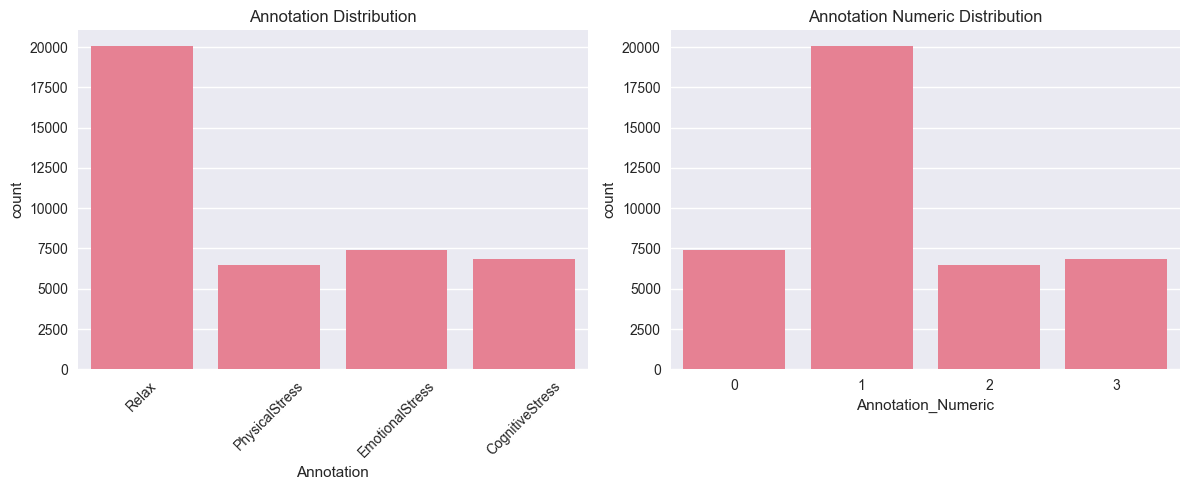


6. Feature Analysis


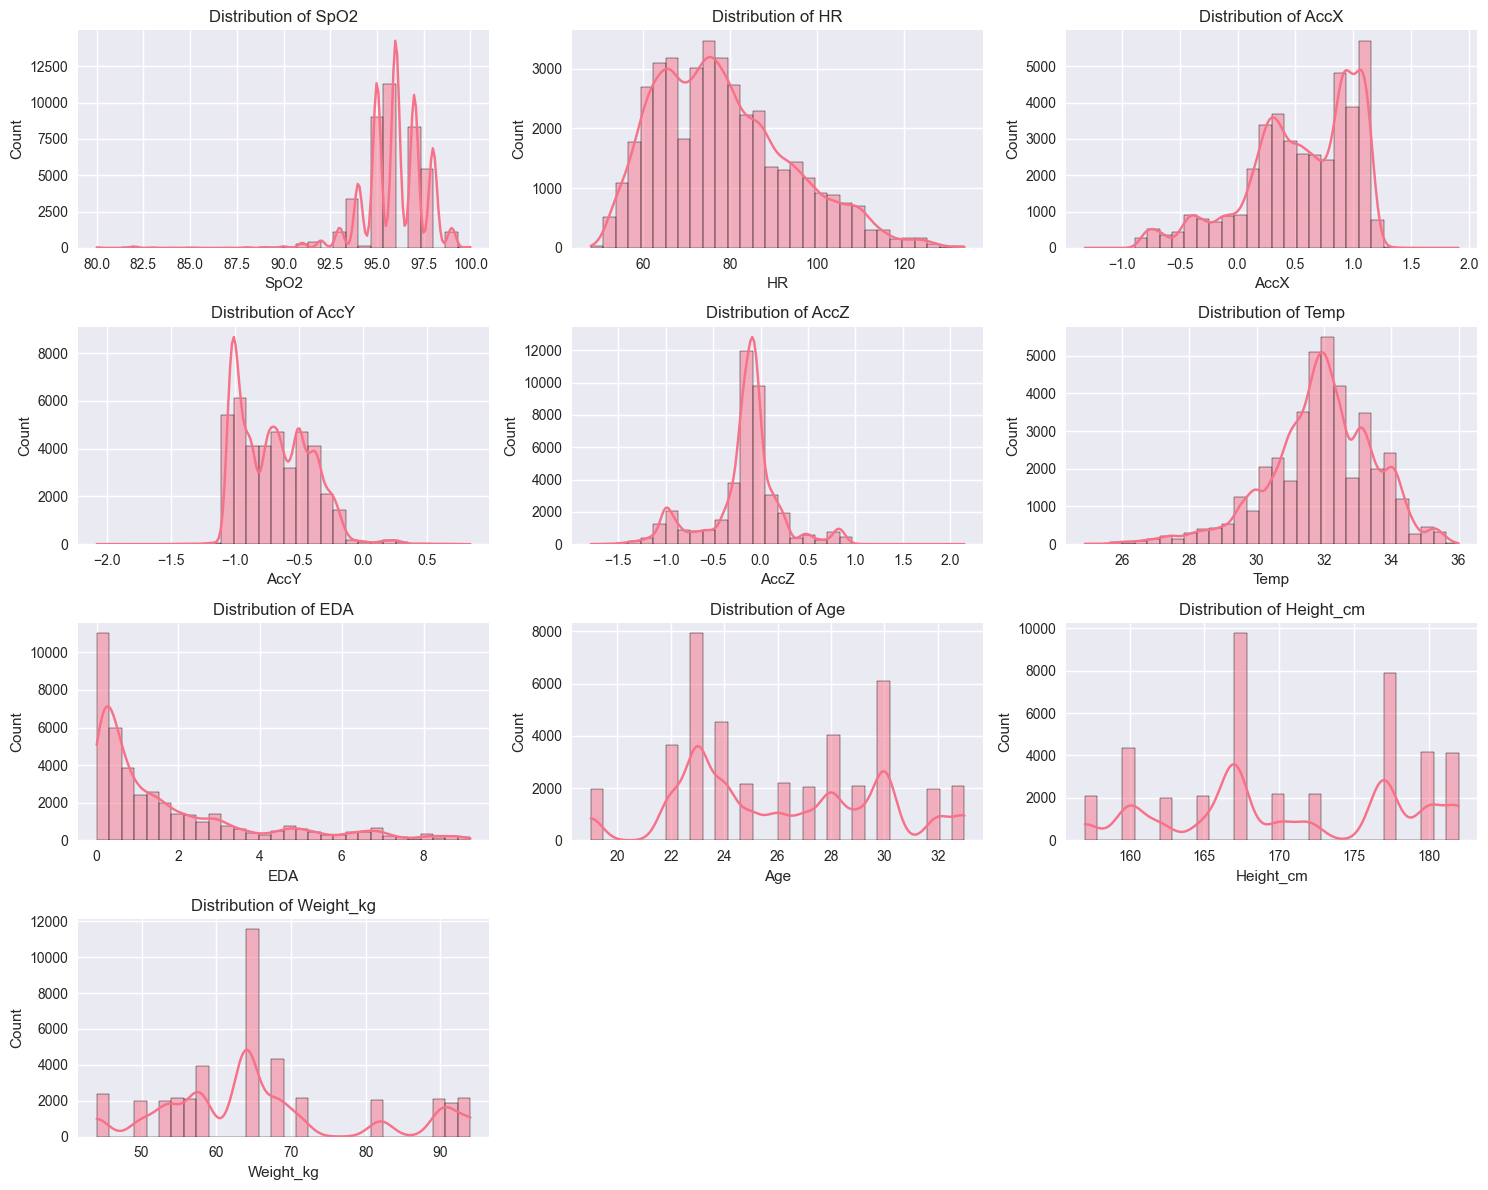

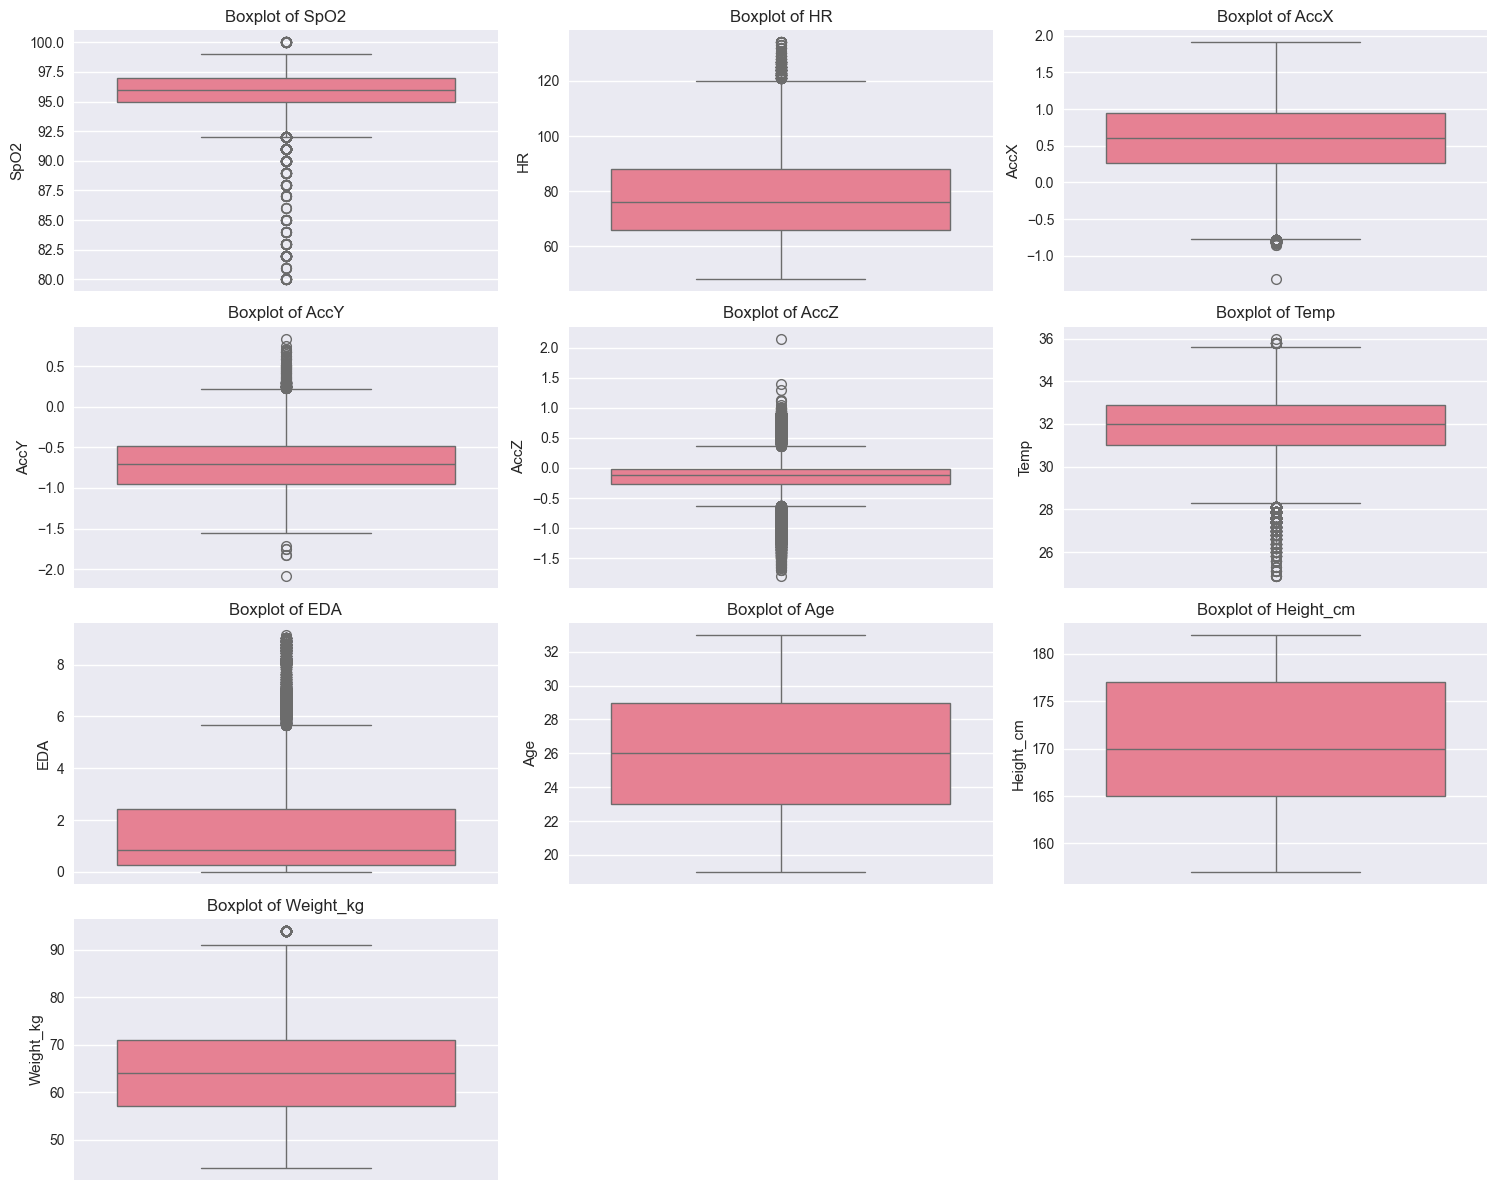


7. Correlation Analysis


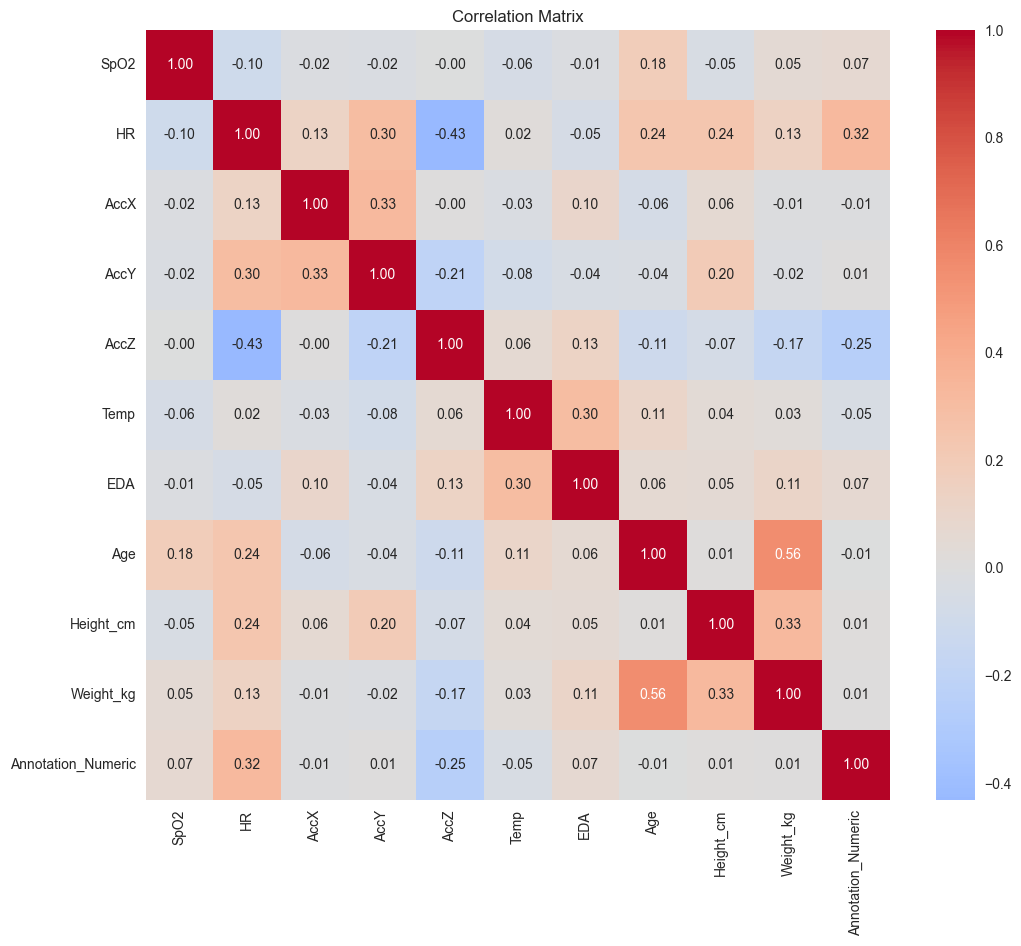


Top Correlations with Target (Annotation_Numeric):
HR      0.321531
AccZ    0.249471
SpO2    0.070486
EDA     0.066161
Temp    0.045613
Name: Annotation_Numeric, dtype: float64

8. Time Series Analysis


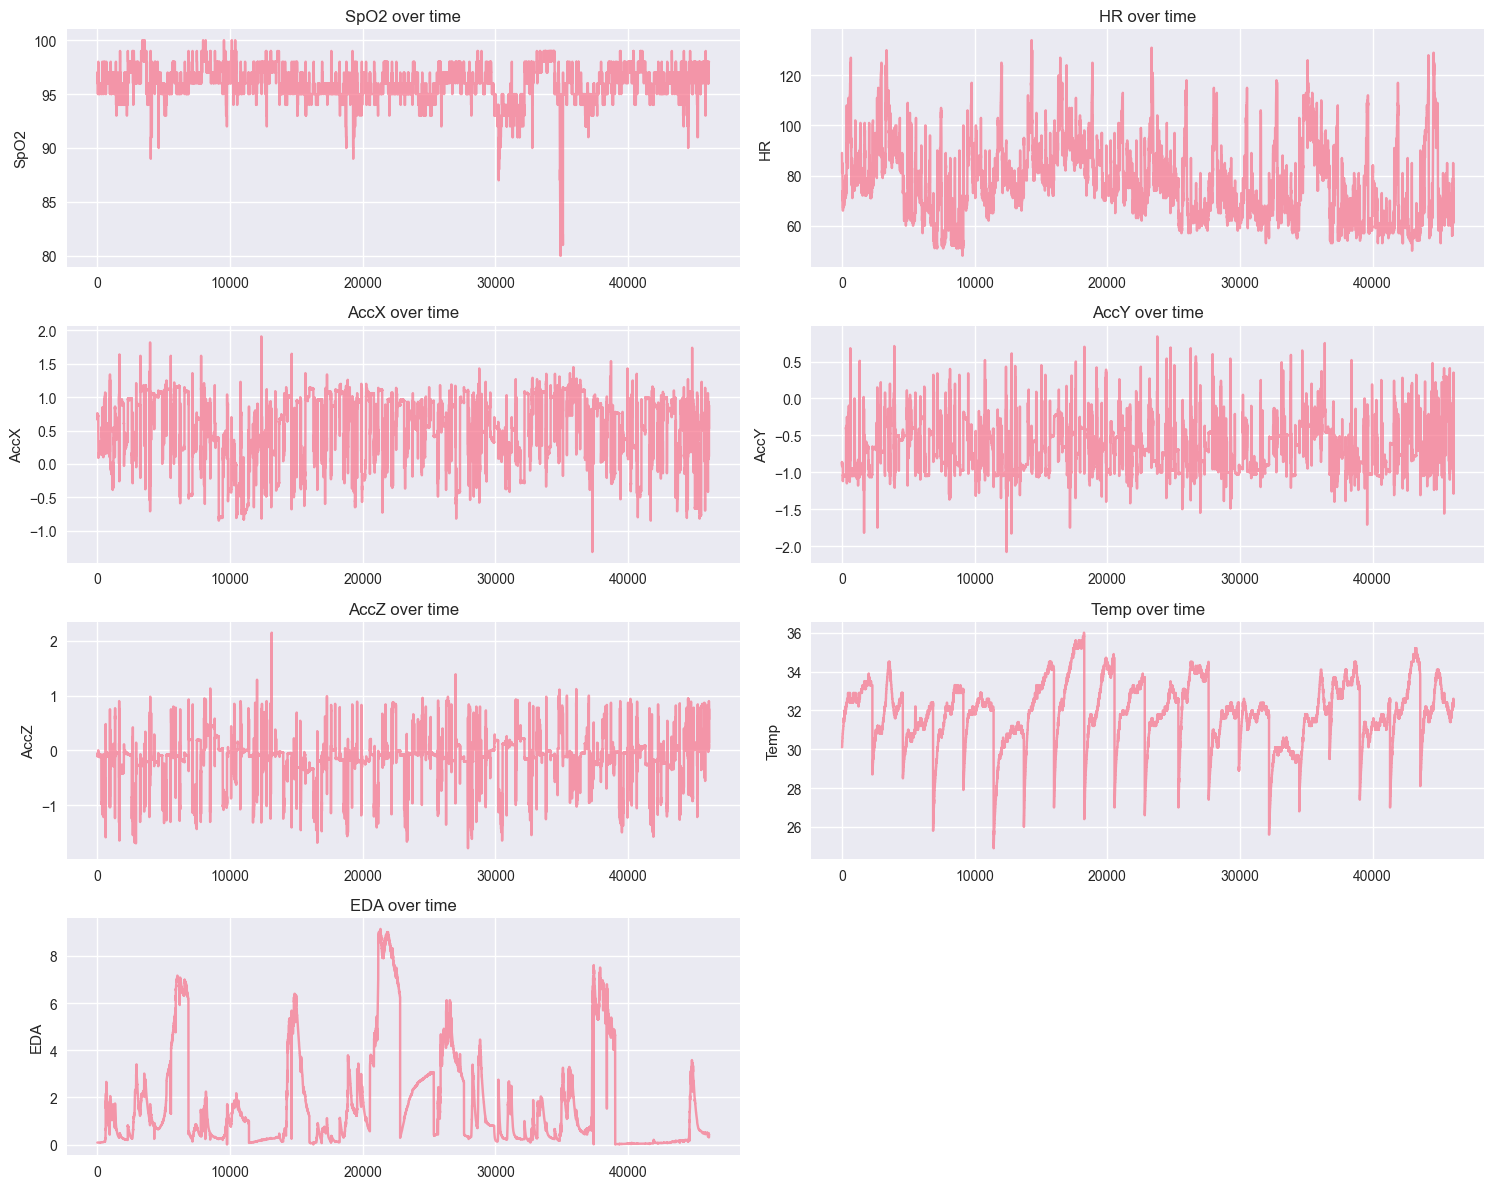


9. Outlier Detection

Number of rows with outliers: 2149

10. Key Findings Summary

1. Dataset shape: (40787, 14)
2. Missing values: True
3. Top correlated features with target:
HR      0.321531
AccZ    0.249471
SpO2    0.070486
EDA     0.066161
Temp    0.045613

4. Outliers detected in 2149 rows


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import plotly.express as px
from IPython.display import display
from pathlib import Path

# Set up visualization style
plt.style.use('seaborn-v0_8')  # Modern alternative to 'seaborn'
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

# Load the dataset (with error handling)
try:
    df = pd.read_csv('./DATA/Supervised_dataset.csv')
except FileNotFoundError:
    raise FileNotFoundError("Dataset file not found! Check the path.")

# ==============================================
# 1. Initial Data Inspection
# ==============================================
print("="*50)
print("1. Initial Data Inspection")
print("="*50)

print("\nDataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nData Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

# ==============================================
# 2. Missing Values Analysis (REPLACED missingno)
# ==============================================
print("\n" + "="*50)
print("2. Missing Values Analysis")
print("="*50)

# Missing values summary
missing_data = df.isnull().sum().to_frame(name='Missing Values')
missing_data['% Missing'] = (missing_data['Missing Values'] / len(df)) * 100
print(missing_data[missing_data['Missing Values'] > 0])

# Visualize missing values (Alternative to msno.matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', pad=20)
plt.show()

# ==============================================
# 3. Data Cleaning
# ==============================================
print("\n" + "="*50)
print("3. Data Cleaning")
print("="*50)

# Count duplicates before removal
duplicates_before = df.duplicated().sum()
print(f"\nNumber of duplicate rows before removal: {duplicates_before}")

# Remove duplicates
df = df.drop_duplicates()

# Count duplicates after removal
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

# Show how many duplicates were removed
print(f"Total duplicate rows removed: {duplicates_before - duplicates_after}")

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\nConstant columns: {constant_cols}")
# ==============================================
# 4. Descriptive Statistics
# ==============================================
print("\n" + "="*50)
print("4. Descriptive Statistics")
print("="*50)

print("\nNumerical Columns Statistics:")
display(df.describe(include=[np.number]).T)

print("\nCategorical Columns Statistics:")
display(df.describe(include=['object']).T)

# ==============================================
# 5. Target Variable Analysis
# ==============================================
print("\n" + "="*50)
print("5. Target Variable Analysis")
print("="*50)

print("\nTarget Variable (Annotation) Distribution:")
print(df['Annotation'].value_counts())

print("\nTarget Variable (Annotation_Numeric) Distribution:")
print(df['Annotation_Numeric'].value_counts())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Annotation', data=df)
plt.title('Annotation Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Annotation_Numeric', data=df)
plt.title('Annotation Numeric Distribution')
plt.tight_layout()
plt.show()

# ==============================================
# 6. Feature Analysis
# ==============================================
print("\n" + "="*50)
print("6. Feature Analysis")
print("="*50)

numerical_features = ['SpO2', 'HR', 'AccX', 'AccY', 'AccZ', 'Temp', 'EDA', 'Age', 'Height_cm', 'Weight_kg']
categorical_features = ['Gender', 'Subject']

# Distribution plots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# ==============================================
# 7. Correlation Analysis
# ==============================================
print("\n" + "="*50)
print("7. Correlation Analysis")
print("="*50)

corr_matrix = df[numerical_features + ['Annotation_Numeric']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("\nTop Correlations with Target (Annotation_Numeric):")
target_corr = corr_matrix['Annotation_Numeric'].abs().sort_values(ascending=False)
print(target_corr[1:6])  # Top 5 only

# ==============================================
# 8. Time Series Analysis
# ==============================================
print("\n" + "="*50)
print("8. Time Series Analysis")
print("="*50)

sensor_cols = ['SpO2', 'HR', 'AccX', 'AccY', 'AccZ', 'Temp', 'EDA']
plt.figure(figsize=(15, 12))
for i, col in enumerate(sensor_cols):
    plt.subplot(4, 2, i+1)
    sns.lineplot(data=df[col], alpha=0.7)
    plt.title(f'{col} over time')
plt.tight_layout()
plt.show()

# ==============================================
# 9. Outlier Detection
# ==============================================
print("\n" + "="*50)
print("9. Outlier Detection")
print("="*50)

z_scores = stats.zscore(df[numerical_features])
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"\nNumber of rows with outliers: {outliers.sum()}")

# ==============================================
# 10. Key Findings Summary
# ==============================================
print("\n" + "="*50)
print("10. Key Findings Summary")
print("="*50)

print("\n1. Dataset shape:", df.shape)
print("2. Missing values:", missing_data[missing_data['Missing Values'] > 0].empty)
print("3. Top correlated features with target:")
print(target_corr[1:6].to_string())
print("\n4. Outliers detected in", outliers.sum(), "rows")


Professional IQR-Based Outlier Analysis


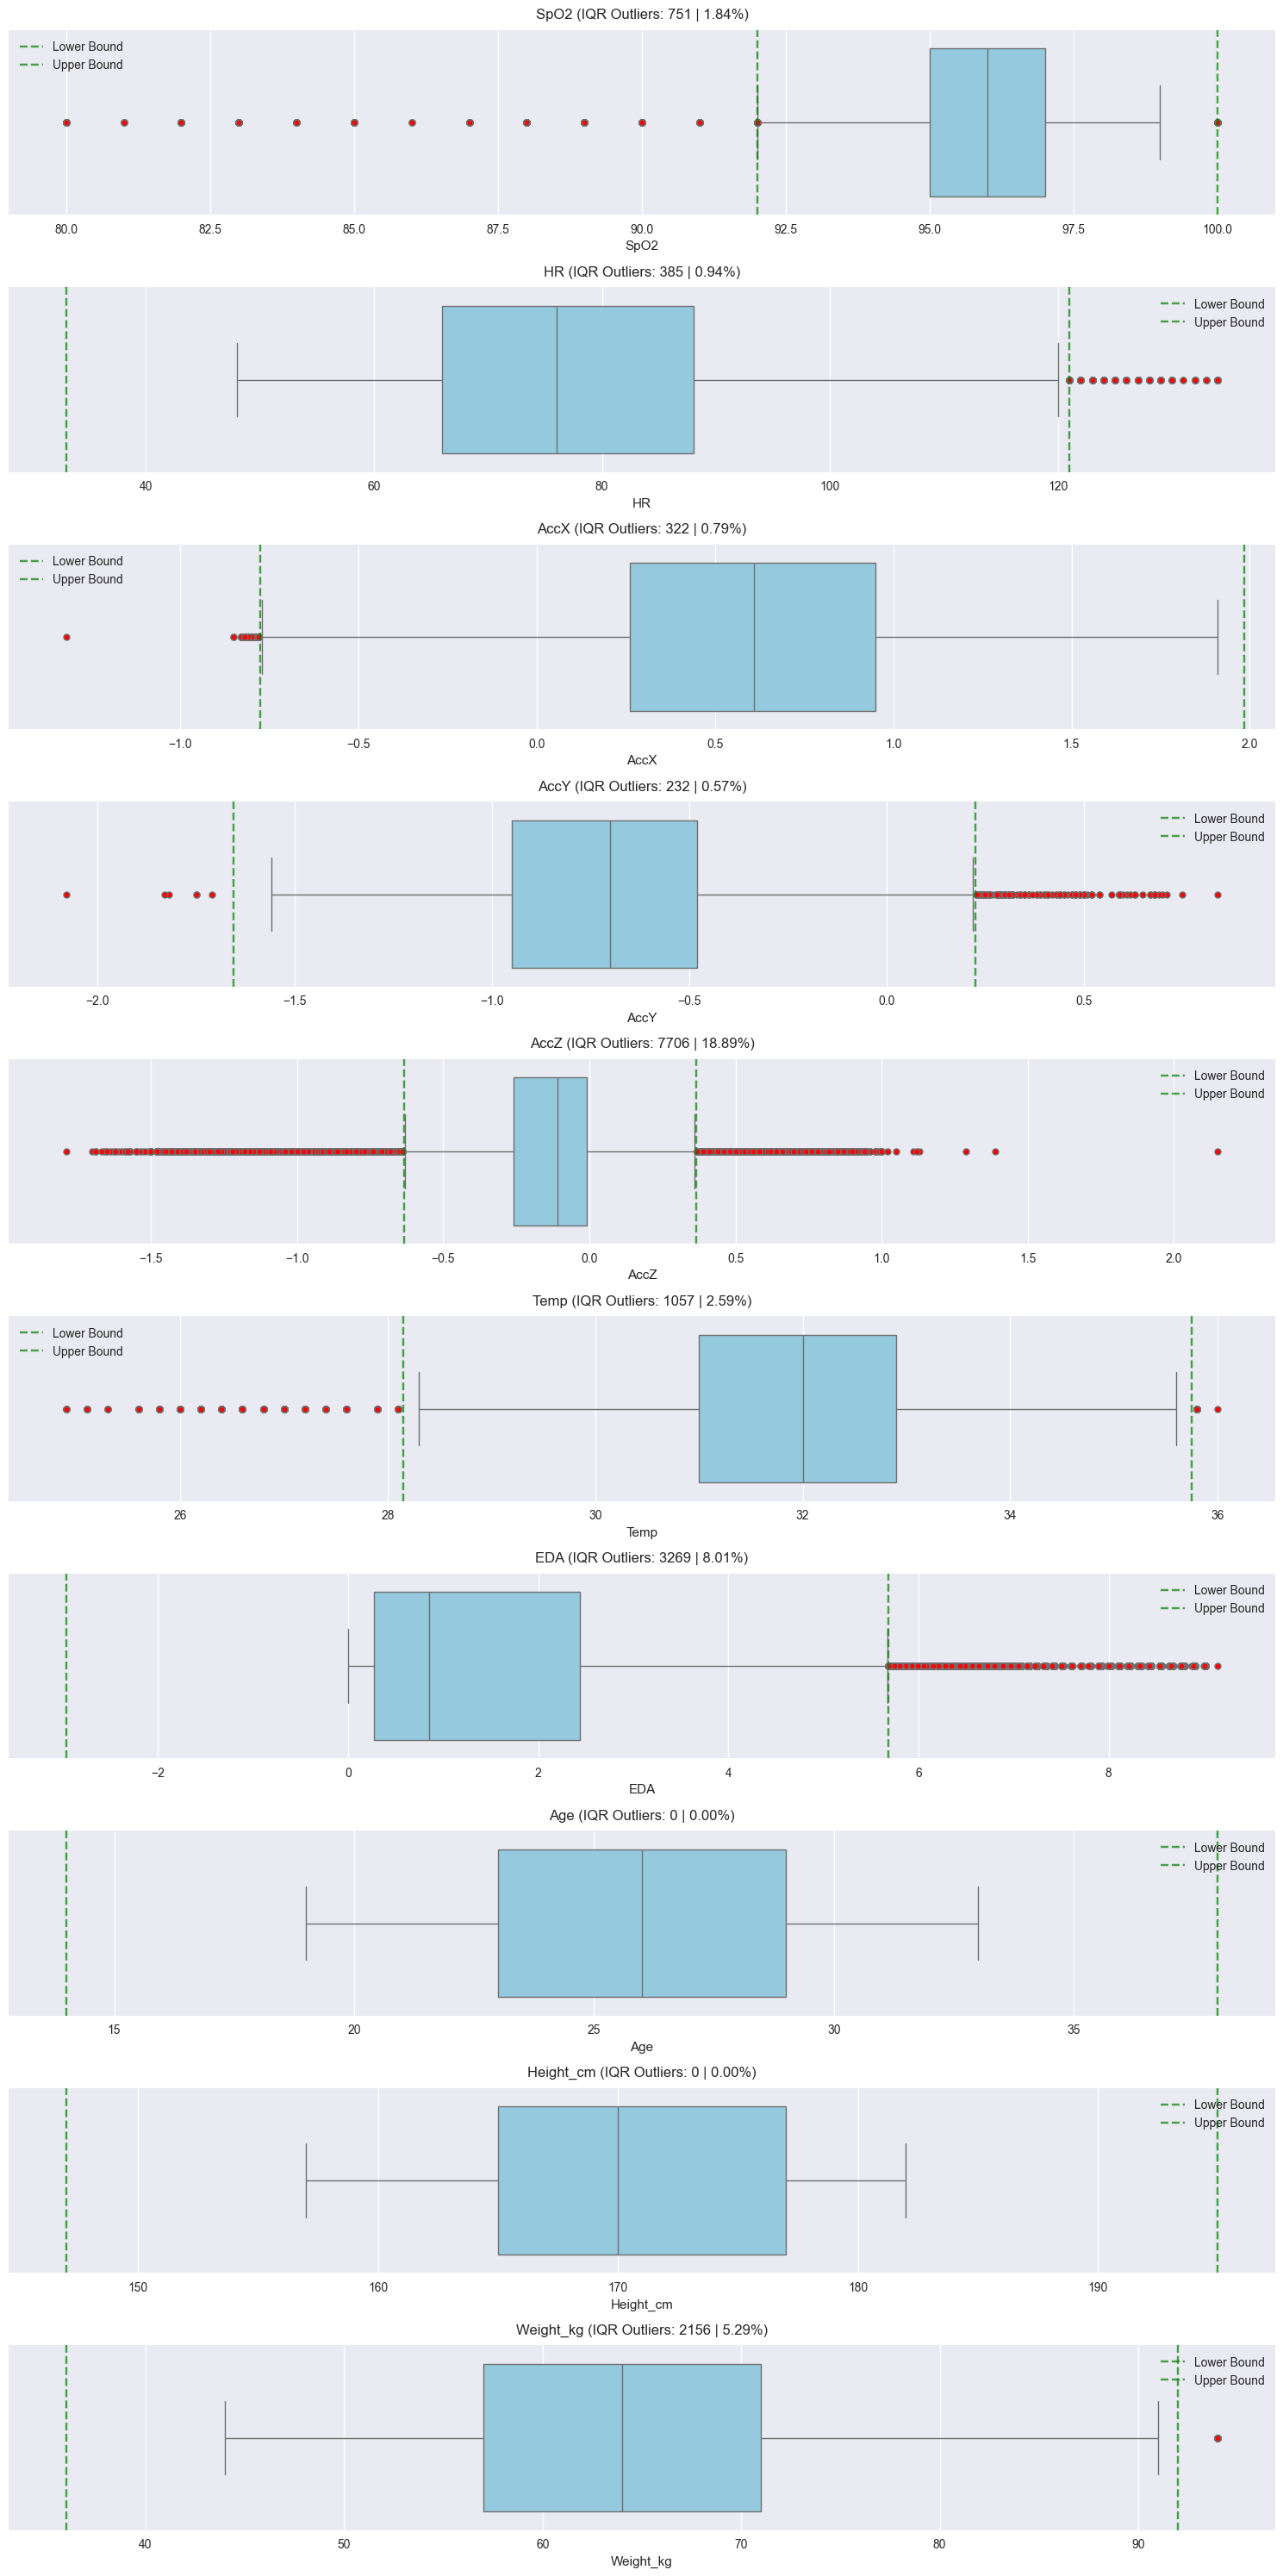


IQR Outlier Analysis Report:


,Feature,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage
0,SpO2,92.000069,99.999886,751,1.84%
1,HR,33.002594,120.998444,385,0.94%
2,AccX,-0.774917,1.984896,322,0.79%
3,AccY,-1.654986,0.225056,232,0.57%
4,AccZ,-0.634951,0.364969,7706,18.89%
5,Temp,28.150107,35.749936,1057,2.59%
6,EDA,-2.964465,5.679475,3269,8.01%
7,Age,14.000000,38.000000,0,0.00%
8,Height_cm,147.000000,195.000000,0,0.00%
9,Weight_kg,36.000000,92.000000,2156,5.29%



Counting row-wise outliers...

Top 10 records with most outliers:


,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Age,Height_cm,Weight_kg,outlier_count
629,95.000031,113.999649,0.440043,0.679979,0.479969,32.399966,1.761965,30,177,94,3
1335,96.000000,83.000732,0.860015,0.289997,0.569990,32.599957,1.685984,30,177,94,3
1336,96.000000,85.000122,0.760015,0.509974,0.569990,32.599957,1.654992,30,177,94,3
1337,96.000000,85.000122,0.420023,0.459960,0.769998,32.899973,1.614970,30,177,94,3
1664,95.000031,77.000702,1.640000,-1.819960,-1.649984,33.299954,0.382036,30,177,94,3
6883,98.000000,54.000656,-0.039982,0.239972,0.929976,26.200021,0.508025,22,167,58,3
6885,98.000000,58.000671,0.150040,0.319991,0.679971,26.200021,0.477032,22,167,58,3
18273,95.000000,93.000641,0.700036,0.309991,0.779991,26.800020,1.094053,25,177,68,3
18274,95.000000,93.000641,0.610014,0.409953,0.789995,26.800020,1.107000,25,177,68,3
18275,95.000000,91.000214,0.430023,0.699962,0.659989,26.800020,1.117005,25,177,68,3


In [2]:
# ==============================================
# Enhanced Outlier Detection with IQR (Optimized Version)
# ==============================================

print("\n" + "="*50)
print("Professional IQR-Based Outlier Analysis")
print("="*50)

def iqr_outlier_detection(df, features):
    """
    Perform IQR-based outlier detection and visual reporting.
    
    Args:
        df (pd.DataFrame): The dataset
        features (list): List of numerical feature column names

    Returns:
        pd.DataFrame: Outlier summary report
        dict: Bounds per feature for reuse
    """
    outlier_report = pd.DataFrame(columns=['Feature', 'Lower Bound', 'Upper Bound', 
                                           'Outlier Count', 'Outlier Percentage'])
    
    bounds = {}
    plt.figure(figsize=(15, len(features) * 3))
    
    for i, col in enumerate(features):
        # Calculate IQR and bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100

        # Add to report
        outlier_report.loc[i] = [col, lower_bound, upper_bound, len(outliers), outlier_pct]

        # Boxplot
        plt.subplot(len(features), 1, i + 1)
        sns.boxplot(x=df[col], color='skyblue', 
                    flierprops=dict(marker='o', markersize=5, markerfacecolor='red'))
        plt.title(f'{col} (IQR Outliers: {len(outliers)} | {outlier_pct:.2f}%)', pad=10)
        plt.axvline(lower_bound, color='green', linestyle='--', alpha=0.7, label='Lower Bound')
        plt.axvline(upper_bound, color='green', linestyle='--', alpha=0.7, label='Upper Bound')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return outlier_report, bounds


# Step 1: Define your features
numerical_features = ['SpO2', 'HR', 'AccX', 'AccY', 'AccZ', 
                      'Temp', 'EDA', 'Age', 'Height_cm', 'Weight_kg']

# Step 2: Run the IQR detection
iqr_report, iqr_bounds = iqr_outlier_detection(df, numerical_features)

# Step 3: Style and display report
styled_report = iqr_report.style.background_gradient(
    cmap='YlOrRd',
    subset=['Outlier Count', 'Outlier Percentage'],
    axis=0
).format({'Outlier Percentage': '{:.2f}%'})

print("\nIQR Outlier Analysis Report:")
display(styled_report)

# Step 4: Count outliers per record (FAST version)
print("\nCounting row-wise outliers...")

# Create boolean masks for all features at once
outlier_mask = np.zeros(df.shape[0], dtype=int)

for col in numerical_features:
    lower, upper = iqr_bounds[col]
    outlier_mask += ((df[col] < lower) | (df[col] > upper)).astype(int)

df['outlier_count'] = outlier_mask

# Step 5: Show top outlier-heavy records
print("\nTop 10 records with most outliers:")
display(df.nlargest(10, 'outlier_count')[numerical_features + ['outlier_count']])



STEP 1: Medical/Sensor Validity Clipping

STEP 2: IQR-Based Capping

STEP 3: Flagging Suspicious Records (FAST VERSION)

STEP 4: Visualization – Boxplots After Cleaning Only


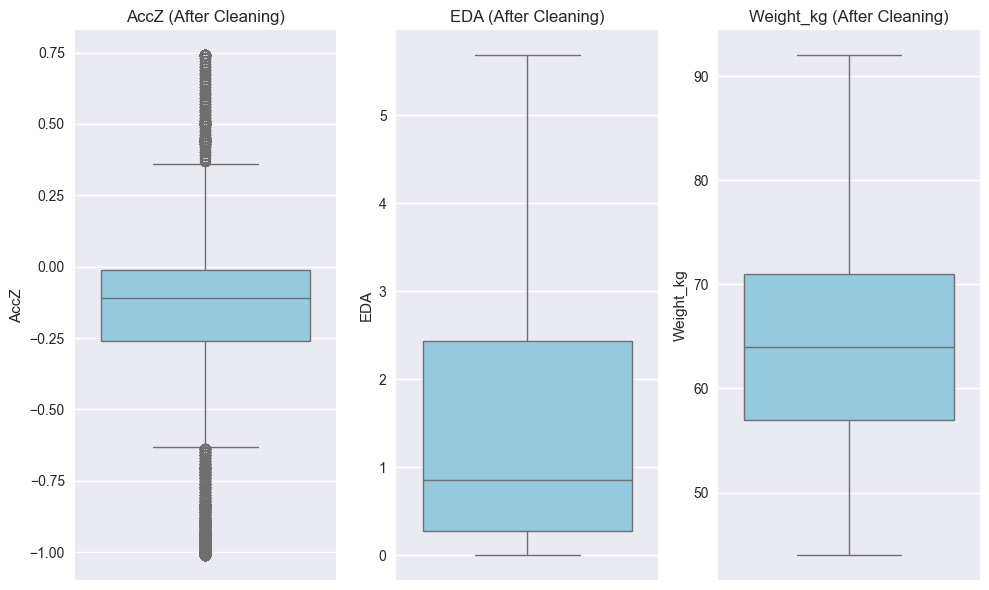


Remaining Outliers (%):


,Remaining Outliers (%)
AccZ,18.89%
EDA,0.00%
Weight_kg,0.00%



🚩 Suspicious Records (≥3 outliers): 1


In [3]:

def comprehensive_outlier_processing(df):
    print("\n" + "="*50)
    print("STEP 1: Medical/Sensor Validity Clipping")
    print("="*50)

    # Clip invalid values
    df['SpO2'] = df['SpO2'].clip(70, 100)
    df['HR'] = df['HR'].clip(40, 200)
    df['Temp'] = df['Temp'].clip(35, 41)
    df['EDA'] = df['EDA'].clip(lower=0)
    for col in ['AccX', 'AccY', 'AccZ']:
        df[col] = df[col].clip(-5, 5)

    print("\n" + "="*50)
    print("STEP 2: IQR-Based Capping")
    print("="*50)

    iqr_features = {
        'strict': ['SpO2', 'HR', 'Temp'],
        'moderate': ['EDA', 'Weight_kg'],
        'sensor': ['AccX', 'AccY', 'AccZ']
    }

    # Strict – Subject-wise
    for feature in iqr_features['strict']:
        q1 = df.groupby('Subject')[feature].transform(lambda x: x.quantile(0.25))
        q3 = df.groupby('Subject')[feature].transform(lambda x: x.quantile(0.75))
        iqr = q3 - q1
        df[feature] = df[feature].clip(q1 - 1.5 * iqr, q3 + 1.5 * iqr)

    # Moderate + Sensor – Global
    for feature in iqr_features['moderate'] + iqr_features['sensor']:
        q1, q3 = df[feature].quantile([0.25, 0.75])
        iqr = q3 - q1
        factor = 3 if feature in iqr_features['sensor'] else 1.5
        df[feature] = df[feature].clip(q1 - factor * iqr, q3 + factor * iqr)

    print("\n" + "="*50)
    print("STEP 3: Flagging Suspicious Records (FAST VERSION)")
    print("="*50)

    # Precompute bounds once
    all_bounds = {}
    for col in iqr_features['strict'] + iqr_features['moderate'] + iqr_features['sensor']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        all_bounds[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

    # Fast vectorized outlier count
    df['outlier_count'] = sum(
        ((df[col] < bounds[0]) | (df[col] > bounds[1])).astype(int)
        for col, bounds in all_bounds.items()
    )
    df['is_suspicious'] = df['outlier_count'] >= 3

    print("\n" + "="*50)
    print("STEP 4: Visualization – Boxplots After Cleaning Only")
    print("="*50)

    features_to_plot = ['AccZ', 'EDA', 'Weight_kg']
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(features_to_plot, 1):
        plt.subplot(1, 3, i)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'{col} (After Cleaning)')
    plt.tight_layout()
    plt.show()

    print("\nRemaining Outliers (%):")
    remaining_outliers = {
        col: ((df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) |
              (df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))).mean() * 100
        for col in features_to_plot
    }
    outlier_summary = pd.DataFrame(remaining_outliers, index=['Remaining Outliers (%)']).T
    display(outlier_summary.style.format("{:.2f}%"))

    print(f"\n🚩 Suspicious Records (≥3 outliers): {df['is_suspicious'].sum()}")
    return df

# ✅ Run it
df_cleaned = comprehensive_outlier_processing(df)


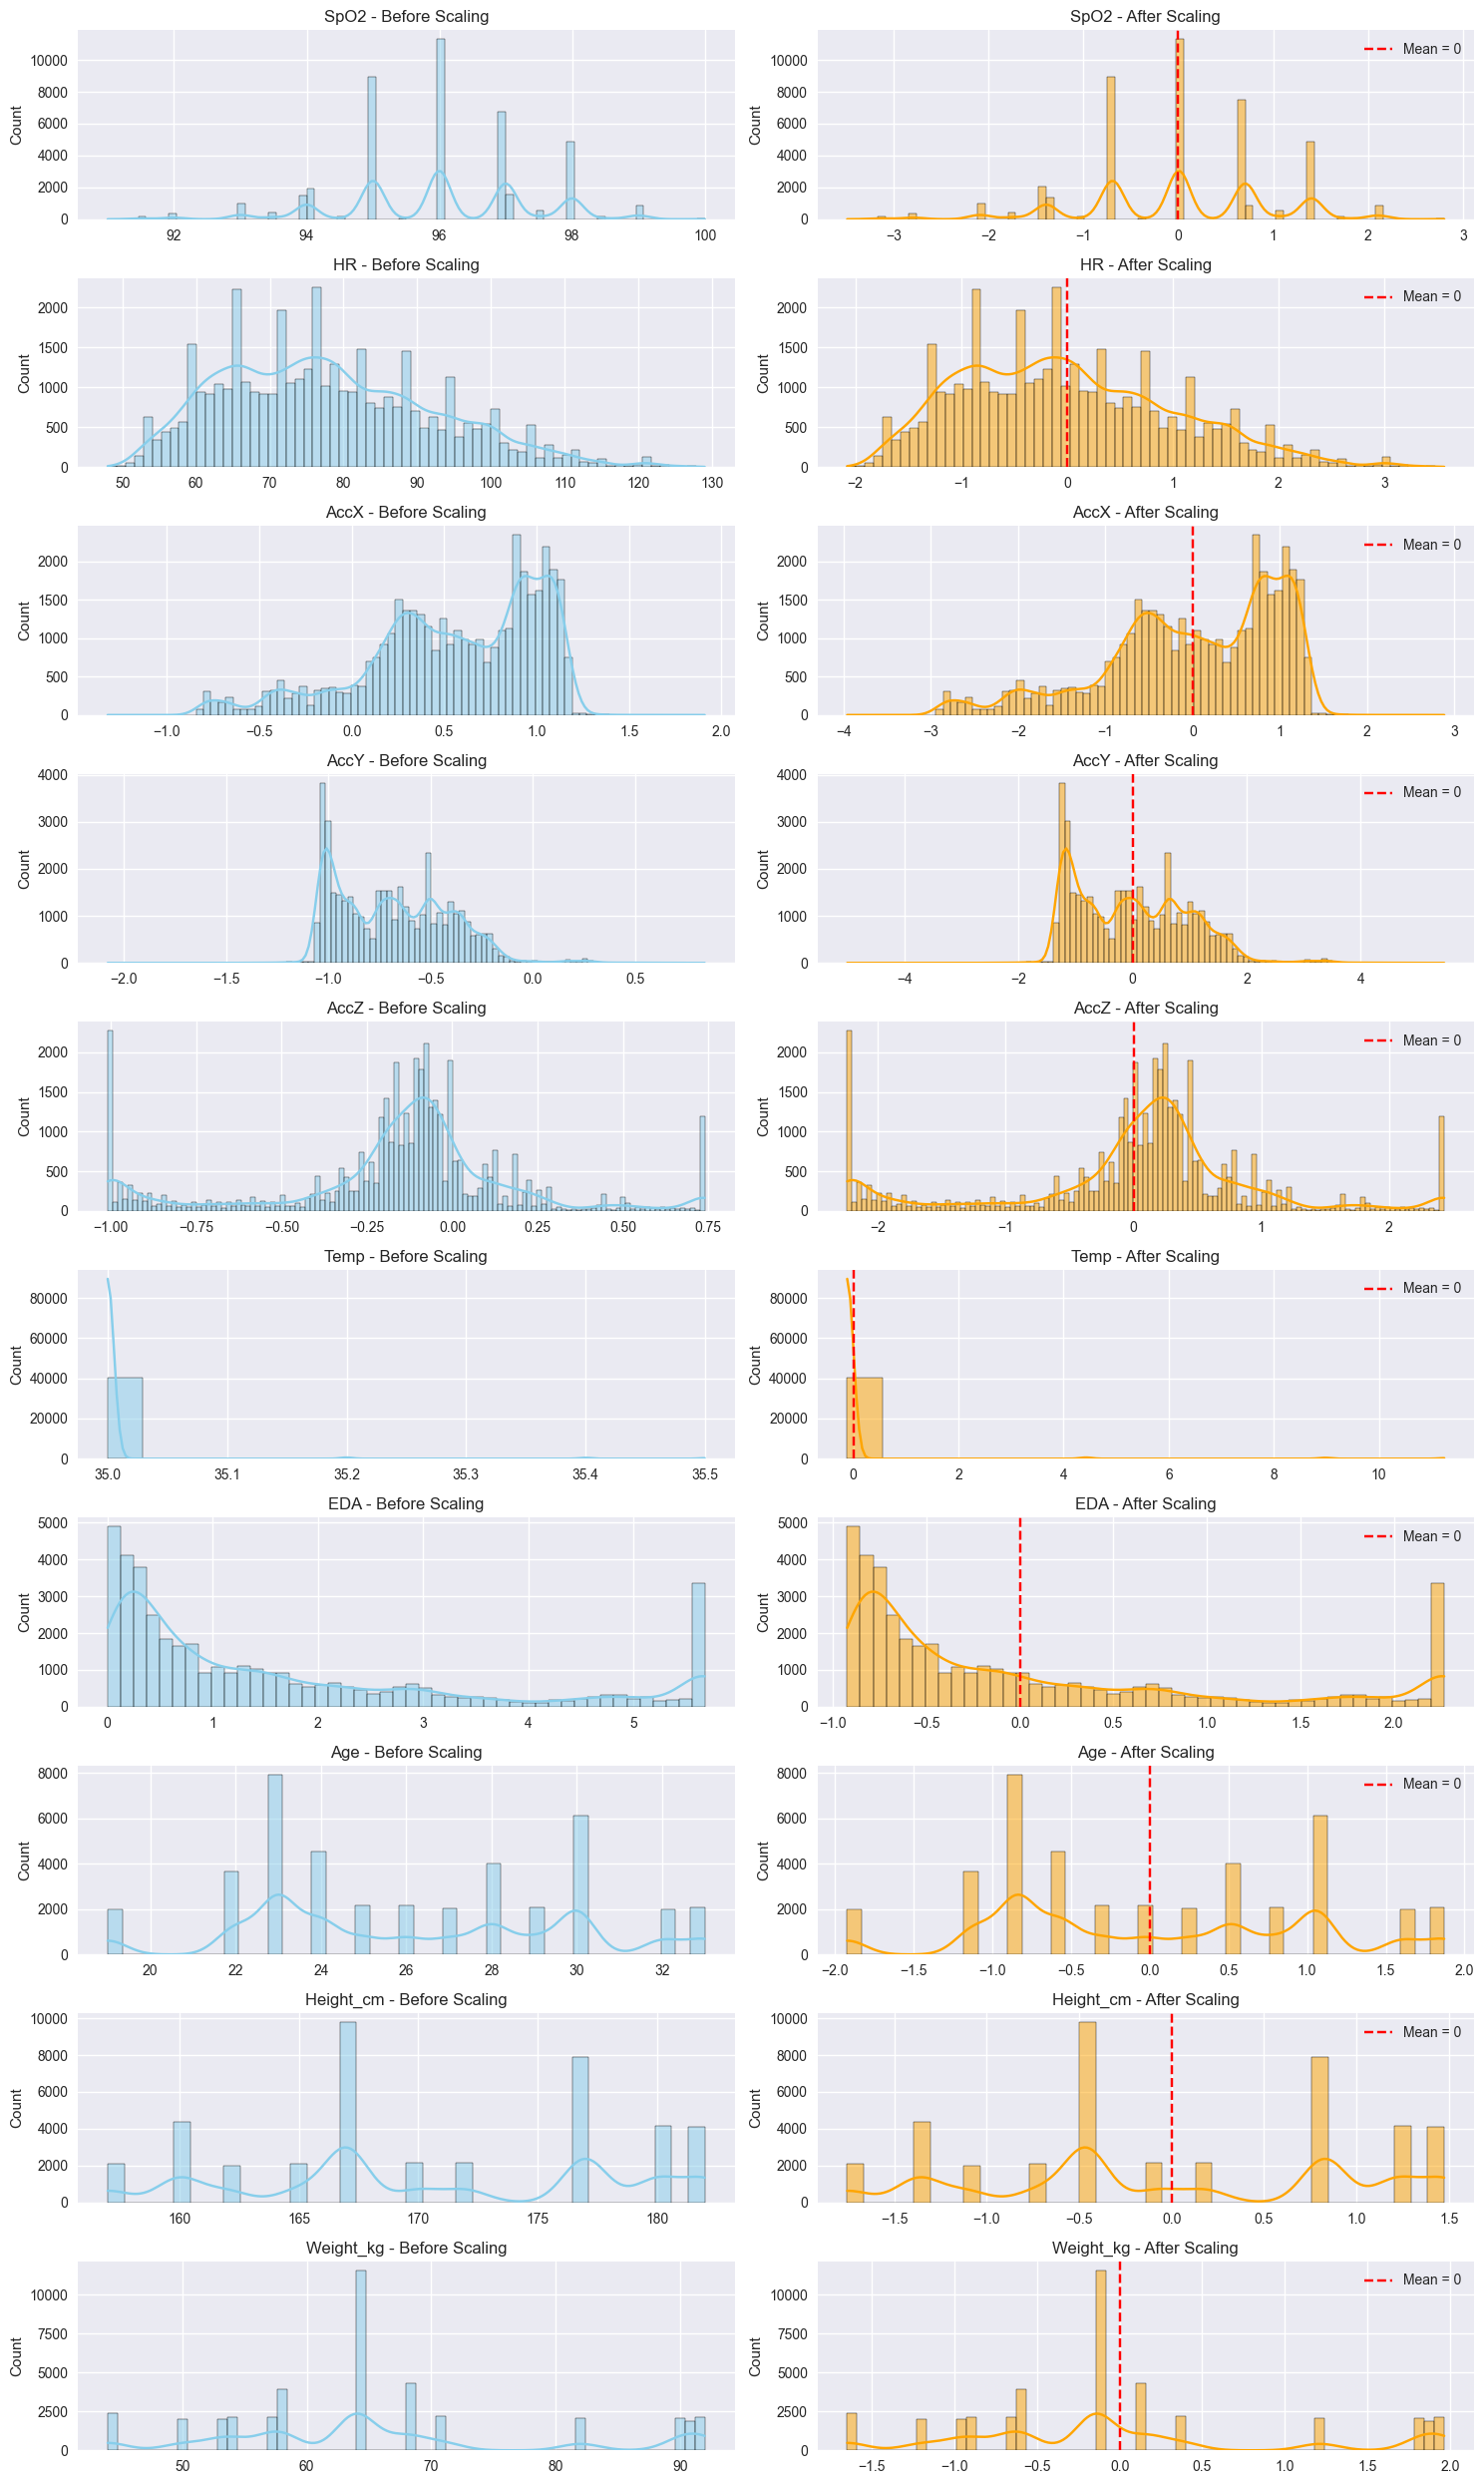

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Age,Height_cm,Weight_kg,Annotation,Annotation_Numeric,Gender,Subject,outlier_count,is_suspicious
0,0.705331,0.779797,0.446899,-0.664082,0.188771,-0.117617,-0.877813,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
1,0.705331,0.710083,0.425689,-0.664082,0.162006,-0.117617,-0.878944,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
2,0.705331,0.640435,0.425689,-0.664082,0.162006,-0.117617,-0.877813,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
3,0.705331,0.640435,0.425689,-0.699919,0.188771,-0.117617,-0.877813,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
4,0.705331,0.640435,0.446899,-0.628244,0.188771,-0.117617,-0.878944,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False


In [4]:
from sklearn.preprocessing import StandardScaler


# Step 1: Select numerical features
numerical_features = ['SpO2', 'HR', 'AccX', 'AccY', 'AccZ', 
                      'Temp', 'EDA', 'Age', 'Height_cm', 'Weight_kg']

# Step 2: Backup before scaling
df_before_scaling = df_cleaned[numerical_features].copy()

# Step 3: Apply StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_cleaned[numerical_features])
scaled_df = pd.DataFrame(scaled_array, columns=numerical_features, index=df_cleaned.index)

# Step 4: Combine with original metadata
df_scaled = pd.concat([
    scaled_df,
    df_cleaned[['Annotation', 'Annotation_Numeric', 'Gender', 'Subject', 'outlier_count', 'is_suspicious']]
], axis=1)

# Step 5: Plot before vs after with red mean line at 0 in after-scaling
num_features = len(numerical_features)
plt.figure(figsize=(15, num_features * 2.5))

for i, col in enumerate(numerical_features):
    # Before Scaling
    plt.subplot(num_features, 2, 2 * i + 1)
    sns.histplot(df_before_scaling[col], kde=True, color='skyblue')
    plt.title(f'{col} - Before Scaling')
    plt.xlabel('')

    # After Scaling with red line at mean = 0
    plt.subplot(num_features, 2, 2 * i + 2)
    sns.histplot(df_scaled[col], kde=True, color='orange')
    plt.axvline(0, color='red', linestyle='--', label='Mean = 0')
    plt.title(f'{col} - After Scaling')
    plt.xlabel('')
    plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Show sample scaled data
display(df_scaled.head())


In [5]:
df_scaled.head()


,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Age,Height_cm,Weight_kg,Annotation,Annotation_Numeric,Gender,Subject,outlier_count,is_suspicious
0,0.705331,0.779797,0.446899,-0.664082,0.188771,-0.117617,-0.877813,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
1,0.705331,0.710083,0.425689,-0.664082,0.162006,-0.117617,-0.878944,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
2,0.705331,0.640435,0.425689,-0.664082,0.162006,-0.117617,-0.877813,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
3,0.705331,0.640435,0.425689,-0.699919,0.188771,-0.117617,-0.877813,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False
4,0.705331,0.640435,0.446899,-0.628244,0.188771,-0.117617,-0.878944,1.058403,0.828764,1.964772,Relax,1,M,Subject1,0,False


In [6]:
df_scaled= df_scaled.drop(['Age','Height_cm','Weight_kg','Gender','Subject','outlier_count','is_suspicious'], axis=1)

In [7]:
df_scaled.shape

(40787, 9)

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Select features and target
features = [
    'SpO2', 'HR', 'AccX', 'AccY', 'AccZ', 'Temp', 'EDA',
    'Age', 'Height_cm', 'Weight_kg'
]
target = 'Annotation_Numeric'

# 2. Prepare X and y
X = df_cleaned[features]
y = df_cleaned[target]

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

c:\Users\yashs\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9532973768080412

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      1475
           1       0.96      0.99      0.97      4008
           2       0.97      0.98      0.98      1300
           3       0.93      0.94      0.93      1375

    accuracy                           0.95      8158
   macro avg       0.95      0.94      0.95      8158
weighted avg       0.95      0.95      0.95      8158



In [9]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid = GridSearchCV(model, param_grid, cv=3, scoring='recall_macro', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

# Evaluate
y_pred = grid.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

c:\Users\yashs\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:35:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1475
           1       0.99      0.99      0.99      4008
           2       0.99      0.99      0.99      1300
           3       0.98      0.98      0.98      1375

    accuracy                           0.99      8158
   macro avg       0.99      0.98      0.98      8158
weighted avg       0.99      0.99      0.99      8158

